## 1. Problem Definition
### Objective: Predict if a patient has heart disease based on medical attributes like age, cholesterol, ECG, etc.

##### Type: Binary Classification
##### Target Variable: target (0 = No Heart Disease, 1 = Heart Disease)

## 2. Data Collection
<p>Collected form Kaggle (<a>https://www.kaggle.com/datasets/jmhasan7/heart-disease-dataset</a>)</p>

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("dataset.csv")  
df.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### 3. Data Cleaning and Preprocessing

In [5]:
print(df.columns.tolist())

['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']


In [6]:
# Check for nulls
print(df.isnull().sum())

# Data types and duplicates
print(df.info())
df = df.drop_duplicates()

# Convert categorical columns
df['sex'] = df['sex'].astype('category')
df['chest pain type'] = df['chest pain type'].astype('category')
df['fasting blood sugar'] = df['fasting blood sugar'].astype('category')
df['resting ecg'] = df['resting ecg'].astype('category')
df['exercise angina'] = df['exercise angina'].astype('category')
df['ST slope'] = df['ST slope'].astype('category')

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190

In [7]:
print(df.columns.tolist())

['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']


### pipeline preprocessing 

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_cols = ['sex', 'chest pain type', 'fasting blood sugar',
                    'resting ecg', 'exercise angina', 'ST slope']
numerical_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


In [10]:
# # Define feature types
# categorical_cols = ['sex', 'chest pain type', 'fasting blood sugar', 
#                     'resting ecg', 'exercise angina', 
#                     'ST slope']

# numerical_cols = ['age', 'resting bp s', 'cholesterol', 
#                   'max heart rate', 'oldpeak']


In [11]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# # Column transformer for preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_cols),
#         ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
#     ]
# )

In [12]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## 4. Exploratory Data Analysis (EDA)

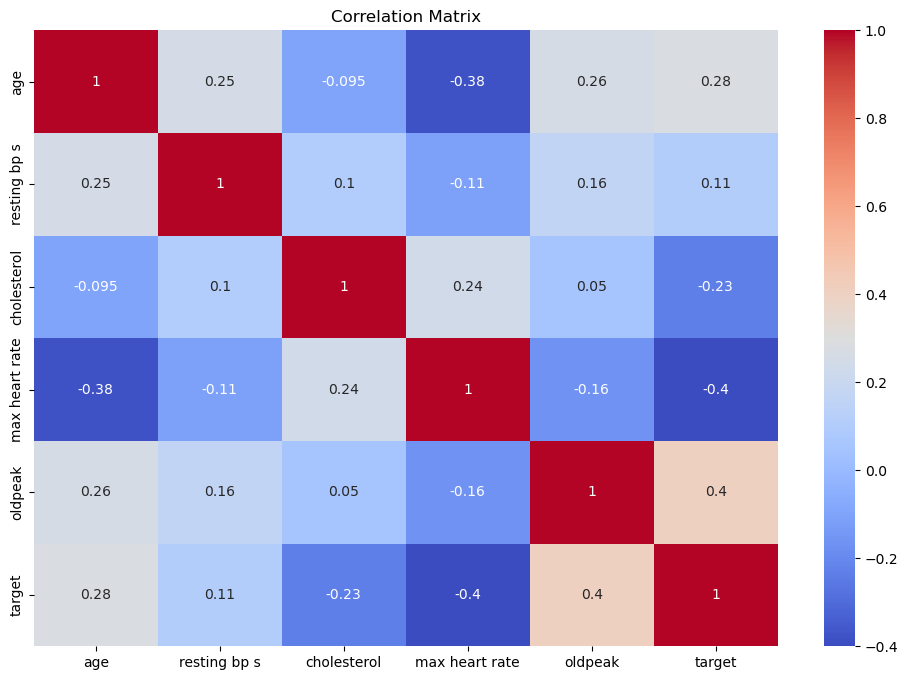

Text(0.5, 1.0, 'Heart Disease Distribution')

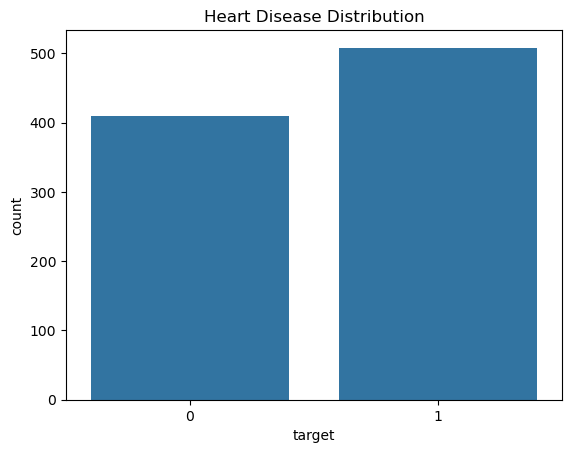

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Distribution of target
sns.countplot(data=df, x='target')
plt.title("Heart Disease Distribution")

## 5. Feature Engineering and Selection
<li>Encode categorical features

<li>Scale numerical features

### Pipeline takes care of them

## 6. Model Selection & Training
We have tried multiple models to find the best model for the task:
<ul>
    <li>Logistic Regression</li>
    <li>Random Forest</li>
    <li>SVM</li>
    <li>KNN</li>
</ul>


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report , accuracy_score
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier


# models = {
#     'Logistic Regression': LogisticRegression(),
#     'SVM': SVC(kernel='rbf', probability=True),
#     'Random Forest': RandomForestClassifier(random_state = 42),
#     'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
#     'KNN': KNeighborsClassifier(n_neighbors=5) 
# }

# for name, clf in models.items():
#     pipe = Pipeline(steps=[
#         ('preprocessing', preprocessor),
#         ('classifier', clf)
#     ])
    
#     pipe.fit(X_train, y_train)
#     y_pred = pipe.predict(X_test)
    
#     print(f"\n=== {name} ===")
#     print(classification_report(y_test, y_pred))


### 1. Define Models & Initial Pipelines

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define base models
base_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

# Define pipelines
pipelines = {}
for name, model in base_models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])


### 2. Evaluation Function (Accuracy, Confusion Matrix, ROC-AUC)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(name, pipeline, X_test, y_test):
    y_pred = pipeline.predict(X_test)

    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # ROC-AUC
    if hasattr(pipeline.named_steps['classifier'], 'predict_proba'):
        y_proba = pipeline.predict_proba(X_test)[:,1]
    else:
        y_proba = pipeline.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.grid()
    plt.show()

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "ROC-AUC": auc
    }


### 3. Train, Evaluate, and Collect Results


=== Logistic Regression ===
Accuracy: 0.8532608695652174
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



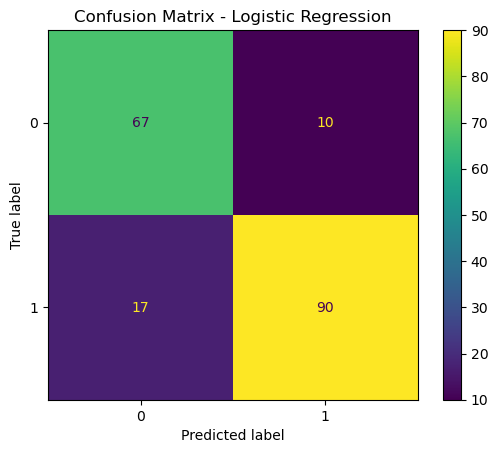

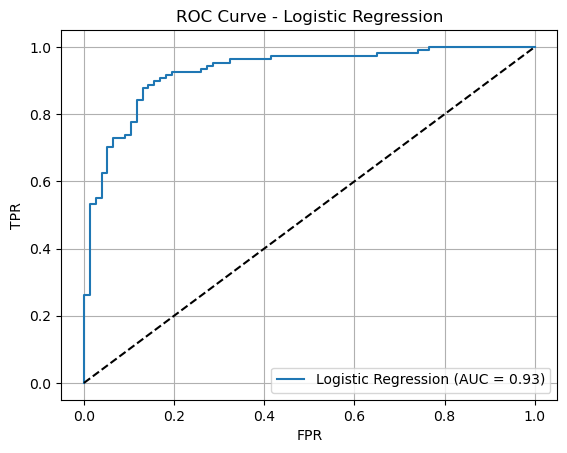


=== Random Forest ===
Accuracy: 0.8967391304347826
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        77
           1       0.92      0.91      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



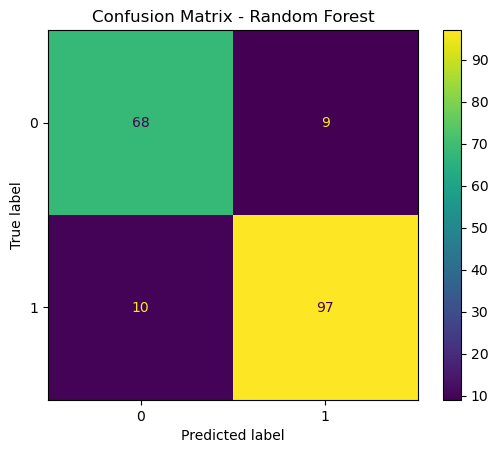

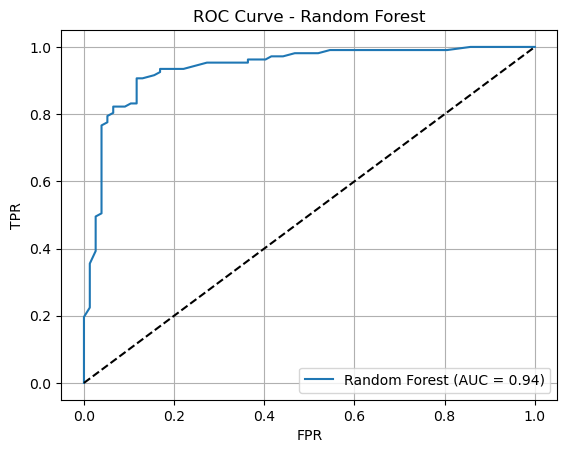


=== SVM ===
Accuracy: 0.8641304347826086
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        77
           1       0.87      0.90      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



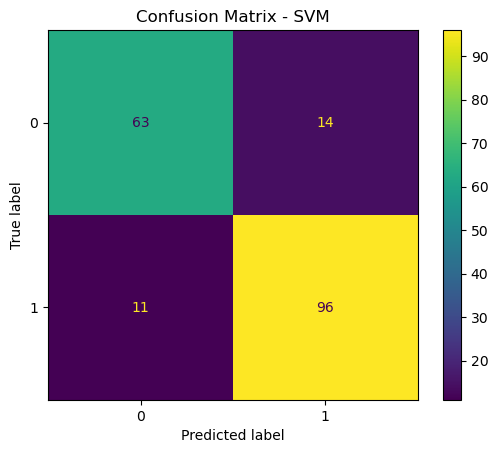

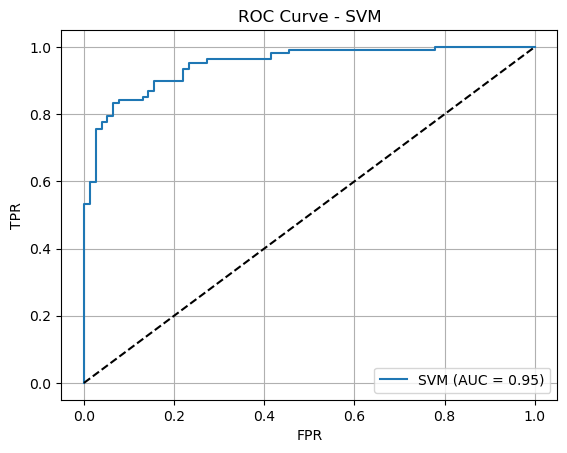


=== KNN ===
Accuracy: 0.8858695652173914
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



C:\Users\itsme\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\itsme\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\itsme\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\itsme\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\itsme\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

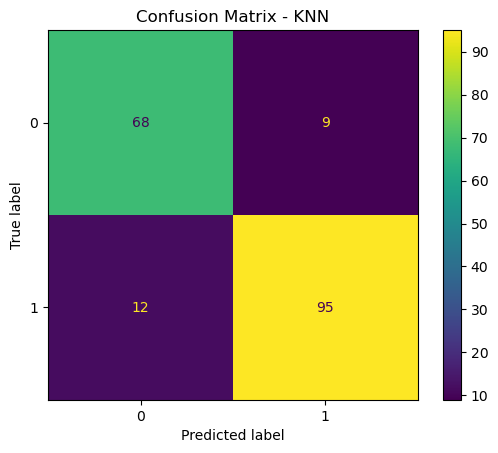

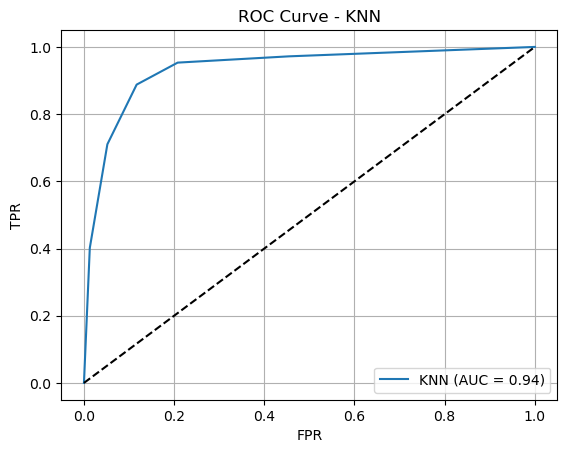

In [24]:
results = []

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    result = evaluate_model(name, pipe, X_test, y_test)
    pipelines[name] = pipe  # Store trained pipeline
    results.append(result)


####  a) Random Forest

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Your ColumnTransformer
    ('classifier', RandomForestClassifier())
])

param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_rf.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'resting '
                                                                          'bp '
                                                                          's',
                                                                          'cholesterol',
                                                                          'max '
                                                                          'heart '
                                                                          'rate',
                                                                          'oldpeak']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['sex',
                                                                          'chest '
                                                                          'pain '
                                                                          'type',
                                                                          'fasting '
                                                                          'blood '
                                                                          'sugar',
                                                                          'resting '
                                                                          'ecg',
                                                                          'exercise '
                                                                          'angina',
                                                                          'ST '
                                                                          'slope'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [None, 5, 10],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits

=== Random Forest (Tuned) ===
Accuracy: 0.8858695652173914
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        77
           1       0.90      0.91      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



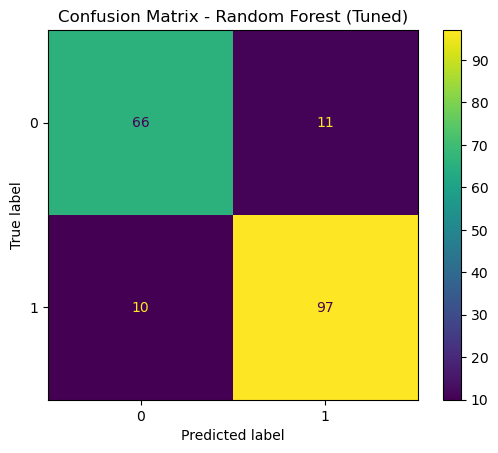

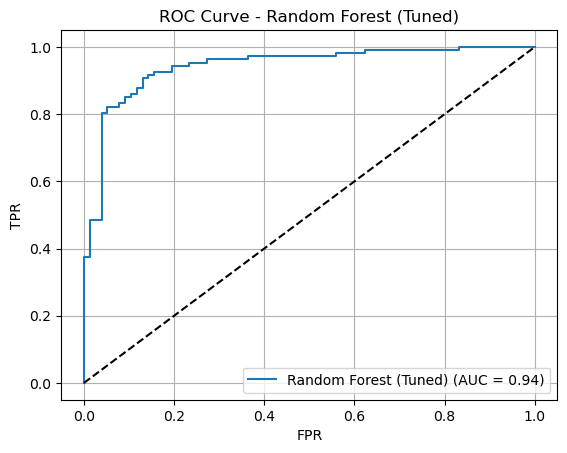

{'Model': 'Random Forest (Tuned)',
 'Accuracy': 0.8858695652173914,
 'ROC-AUC': 0.9425901201602136}

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    pipelines['Random Forest'], param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
evaluate_model("Random Forest (Tuned)", best_rf, X_test, y_test)


#### b) SVM

In [29]:
pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))
])

param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 0.1]
}

grid_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy', verbose=1)
grid_svm.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'resting '
                                                                          'bp '
                                                                          's',
                                                                          'cholesterol',
                                                                          'max '
                                                                          'heart '
                                                                          'rate',
                                                                          'oldpeak']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['sex',
                                                                          'chest '
                                                                          'pain '
                                                                          'type',
                                                                          'fasting '
                                                                          'blood '
                                                                          'sugar',
                                                                          'resting '
                                                                          'ecg',
                                                                          'exercise '
                                                                          'angina',
                                                                          'ST '
                                                                          'slope'])])),
                                       ('classifier', SVC(probability=True))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 0.1],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

Fitting 5 folds for each of 18 candidates, totalling 90 fits

=== SVM (Tuned) ===
Accuracy: 0.8641304347826086
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        77
           1       0.87      0.90      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



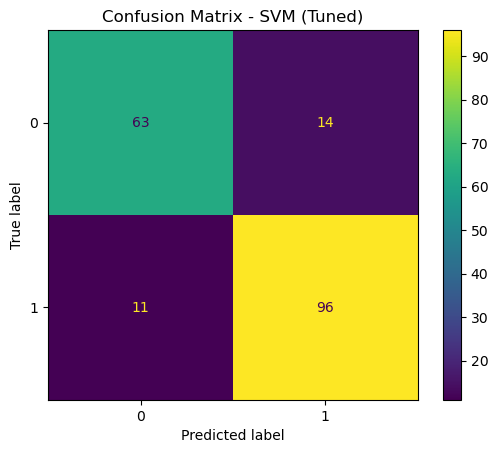

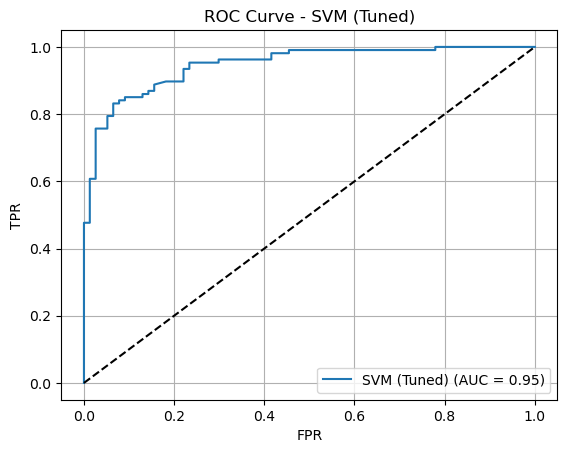

{'Model': 'SVM (Tuned)',
 'Accuracy': 0.8641304347826086,
 'ROC-AUC': 0.9467168345673018}

In [30]:
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 0.1, 1]
}

grid_svm = GridSearchCV(
    pipelines['SVM'], param_grid_svm, cv=5, scoring='accuracy', verbose=1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
evaluate_model("SVM (Tuned)", best_svm, X_test, y_test)


### 5.Final Comparison Function

In [32]:
import pandas as pd

def compare_all_models(models_dict, X_test, y_test):
    comparison = []

    for name, pipe in models_dict.items():
        y_pred = pipe.predict(X_test)
        y_proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe.named_steps['classifier'], "predict_proba") else pipe.decision_function(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)
        comparison.append({"Model": name, "Accuracy": acc, "ROC-AUC": auc})
    
    return pd.DataFrame(comparison).sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)


In [33]:
pipelines["Random Forest (Tuned)"] = best_rf
pipelines["SVM (Tuned)"] = best_svm

comparison_df = compare_all_models(pipelines, X_test, y_test)
print(comparison_df)


                   Model  Accuracy   ROC-AUC
0                    SVM  0.864130  0.947445
1            SVM (Tuned)  0.864130  0.946717
2  Random Forest (Tuned)  0.885870  0.942590
3          Random Forest  0.896739  0.938160
4                    KNN  0.885870  0.935186
5    Logistic Regression  0.853261  0.927540


#### Save the final model

In [35]:
import pickle
with open("heart_pipeline.pkl", "wb") as f:
    pickle.dump(best_rf, f)

In [37]:
import joblib

joblib.dump(pipelines, 'heart_pipeline.pkl')


['heart_pipeline.pkl']